In [1]:
#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [2]:
#initial read and print of motifs_dataframe
motifs_df = pd.read_csv("../rosetta_motifs/rmsd_total_best_1.csv")
motifs_df

,system,rmsd,placement_pdb
0,hdac2,0.363623,hdac2_ResPos_22_ResID_MET_Trio36_+_motif_3PZH_...
1,gria2,0.265117,gria2_ResPos_249_ResID_GLU_Trio31_+_motif_4V2O...
2,jak2,0.117574,jak2_ResPos_39_ResID_ALA_Trio51_+_motif_5EAK_2...
3,fa7,7.358665,fa7_ResPos_83_ResID_THR_Trio5_+_motif_2K2G_DSV...
4,rxra,0.449446,rxra_ResPos_21_ResID_ILE_Trio35_+_motif_4RJJ_T...
...,...,...,...
80,esr2,0.372955,esr2_ResPos_180_ResID_LEU_Trio64_+_motif_4LR6_...
81,xiap,8.002771,xiap_ResPos_53_ResID_LEU_Trio16_+_motif_1BEQ_H...
82,akt2,0.122862,akt2_ResPos_21_ResID_VAL_Trio38_+_motif_3QJ5_0...
83,comt,5.851234,comt_ResPos_134_ResID_TRP_Trio1_+_motif_5CX7_H...


In [3]:
#initial read and print of AutoDock Vina dataframe
ad_df = pd.read_csv("../AutoDock_Vina/ADV_best_rmsds_top_1.csv",header=None)
ad_df

,0,1
0,def,7.384645
1,nram,0.533947
2,fa10,0.398882
3,fak1,0.442263
4,aofb,6.102832
...,...,...
97,aldr,0.526612
98,inha,1.883266
99,pur2,0.755583
100,pgh2,0.636627


In [4]:
#rename autodock columns to be "system" and "rmsd" like with motifs dataframe (initial .csv did not have header line)
ad_df.columns = ['system', 'rmsd']
#test print
ad_df

,system,rmsd
0,def,7.384645
1,nram,0.533947
2,fa10,0.398882
3,fak1,0.442263
4,aofb,6.102832
...,...,...
97,aldr,0.526612
98,inha,1.883266
99,pur2,0.755583
100,pgh2,0.636627


In [5]:
#Inner join of motifs and autodock dataframes for plotting purposes; followed with test print
merged_df = pd.merge(motifs_df, ad_df, on='system', how='inner')
merged_df

,system,rmsd_x,placement_pdb,rmsd_y
0,hdac2,0.363623,hdac2_ResPos_22_ResID_MET_Trio36_+_motif_3PZH_...,0.237670
1,gria2,0.265117,gria2_ResPos_249_ResID_GLU_Trio31_+_motif_4V2O...,1.208393
2,jak2,0.117574,jak2_ResPos_39_ResID_ALA_Trio51_+_motif_5EAK_2...,0.687935
3,fa7,7.358665,fa7_ResPos_83_ResID_THR_Trio5_+_motif_2K2G_DSV...,1.431104
4,rxra,0.449446,rxra_ResPos_21_ResID_ILE_Trio35_+_motif_4RJJ_T...,1.726665
...,...,...,...,...
80,esr2,0.372955,esr2_ResPos_180_ResID_LEU_Trio64_+_motif_4LR6_...,7.634945
81,xiap,8.002771,xiap_ResPos_53_ResID_LEU_Trio16_+_motif_1BEQ_H...,2.892541
82,akt2,0.122862,akt2_ResPos_21_ResID_VAL_Trio38_+_motif_3QJ5_0...,0.274645
83,comt,5.851234,comt_ResPos_134_ResID_TRP_Trio1_+_motif_5CX7_H...,7.348216


In [6]:
#drop placement_pdb column from motifs dataframe
merged_df = merged_df.drop(columns=['placement_pdb'])
#rename columns for rmsd from motifs and autodock
merged_df.columns = ['system', 'rmsd_motifs', 'rmsd_adv']
#test_print
merged_df

,system,rmsd_motifs,rmsd_adv
0,hdac2,0.363623,0.237670
1,gria2,0.265117,1.208393
2,jak2,0.117574,0.687935
3,fa7,7.358665,1.431104
4,rxra,0.449446,1.726665
...,...,...,...
80,esr2,0.372955,7.634945
81,xiap,8.002771,2.892541
82,akt2,0.122862,0.274645
83,comt,5.851234,7.348216


In [7]:
#initial read and print of Schrodinger Glide dataframe
sg_df = pd.read_csv("../schrodinger_glide/glide_best_rmsd.csv")
sg_df

,system_name,best_rmsd,best_rmsd_pose,total_poses
0,aa2ar,7.927534,13.0,15.0
1,abl1,0.424373,1.0,1.0
2,ace,3.781334,1.0,8.0
3,aces,0.638513,4.0,5.0
4,ada,1.452599,1.0,4.0
...,...,...,...,...
97,tysy,1.925273,4.0,4.0
98,urok,0.849532,1.0,5.0
99,vgfr2,1.357784,2.0,3.0
100,wee1,0.710819,6.0,6.0


In [8]:
#rename schrodinger columns to be 'system', 'rmsd', 'best_pose', 'num_poses' like with motifs dataframe (initial .csv did not have header line)
sg_df.columns = ['system', 'rmsd', 'best_pose', 'num_poses']
#test print
sg_df

,system,rmsd,best_pose,num_poses
0,aa2ar,7.927534,13.0,15.0
1,abl1,0.424373,1.0,1.0
2,ace,3.781334,1.0,8.0
3,aces,0.638513,4.0,5.0
4,ada,1.452599,1.0,4.0
...,...,...,...,...
97,tysy,1.925273,4.0,4.0
98,urok,0.849532,1.0,5.0
99,vgfr2,1.357784,2.0,3.0
100,wee1,0.710819,6.0,6.0


In [9]:
sg_df = sg_df[sg_df['rmsd'].isna() == False]
sg_df

,system,rmsd,best_pose,num_poses
0,aa2ar,7.927534,13.0,15.0
1,abl1,0.424373,1.0,1.0
2,ace,3.781334,1.0,8.0
3,aces,0.638513,4.0,5.0
4,ada,1.452599,1.0,4.0
...,...,...,...,...
97,tysy,1.925273,4.0,4.0
98,urok,0.849532,1.0,5.0
99,vgfr2,1.357784,2.0,3.0
100,wee1,0.710819,6.0,6.0


In [10]:
#Inner join of motifs and shrodinger dataframes for plotting purposes; followed with test print
merged_df = pd.merge(merged_df, sg_df, on='system', how='inner')
merged_df

,system,rmsd_motifs,rmsd_adv,rmsd,best_pose,num_poses
0,hdac2,0.363623,0.237670,5.870451,3.0,6.0
1,gria2,0.265117,1.208393,1.184185,1.0,3.0
2,jak2,0.117574,0.687935,0.954033,5.0,12.0
3,fa7,7.358665,1.431104,1.269014,4.0,11.0
4,rxra,0.449446,1.726665,1.617857,5.0,6.0
...,...,...,...,...,...,...
79,esr2,0.372955,7.634945,1.280179,5.0,8.0
80,xiap,8.002771,2.892541,2.461600,7.0,11.0
81,akt2,0.122862,0.274645,0.843241,1.0,2.0
82,comt,5.851234,7.348216,3.844448,7.0,8.0


In [11]:
#drop non-needed columns from merged dataframe
#merged_df = merged_df.drop(columns=['placement_pdb'])
merged_df = merged_df.drop(columns=['best_pose'])
merged_df = merged_df.drop(columns=['num_poses'])
#rename columns for rmsd from motifs and autodock
merged_df.columns = ['system', 'rmsd_motifs', 'rmsd_adv', 'rmsd_sg']
#test_print
merged_df

,system,rmsd_motifs,rmsd_adv,rmsd_sg
0,hdac2,0.363623,0.237670,5.870451
1,gria2,0.265117,1.208393,1.184185
2,jak2,0.117574,0.687935,0.954033
3,fa7,7.358665,1.431104,1.269014
4,rxra,0.449446,1.726665,1.617857
...,...,...,...,...
79,esr2,0.372955,7.634945,1.280179
80,xiap,8.002771,2.892541,2.461600
81,akt2,0.122862,0.274645,0.843241
82,comt,5.851234,7.348216,3.844448


In [12]:
#read in the Dock 3.7 data
dock_df = pd.read_csv("../dock6/dock6_best_rmsds_top_1.csv")
dock_df

,system,rmsd
0,def,1.150446
1,nram,12.485003
2,fa10,0.391006
3,fak1,0.450984
4,aofb,0.742440
...,...,...
97,aldr,11.201600
98,inha,1.321603
99,pur2,15.028349
100,pgh2,0.443416


In [13]:
#remove any nan
dock_df = dock_df[dock_df['rmsd'].isna() == False]
dock_df

,system,rmsd
0,def,1.150446
1,nram,12.485003
2,fa10,0.391006
3,fak1,0.450984
4,aofb,0.742440
...,...,...
97,aldr,11.201600
98,inha,1.321603
99,pur2,15.028349
100,pgh2,0.443416


In [14]:
#Inner join of motifs and dock dataframes for plotting purposes; followed with test print
merged_df = pd.merge(merged_df, dock_df, on='system', how='inner')
merged_df

,system,rmsd_motifs,rmsd_adv,rmsd_sg,rmsd
0,hdac2,0.363623,0.237670,5.870451,0.360524
1,gria2,0.265117,1.208393,1.184185,15.715689
2,jak2,0.117574,0.687935,0.954033,0.205132
3,fa7,7.358665,1.431104,1.269014,0.223832
4,rxra,0.449446,1.726665,1.617857,17.537762
...,...,...,...,...,...
79,esr2,0.372955,7.634945,1.280179,0.466736
80,xiap,8.002771,2.892541,2.461600,0.507777
81,akt2,0.122862,0.274645,0.843241,0.353151
82,comt,5.851234,7.348216,3.844448,5.868612


In [15]:
#rename column for rmsd from dock
merged_df.columns = ['system', 'rmsd_motifs', 'rmsd_adv', 'rmsd_sg', 'rmsd_dock']
merged_df

,system,rmsd_motifs,rmsd_adv,rmsd_sg,rmsd_dock
0,hdac2,0.363623,0.237670,5.870451,0.360524
1,gria2,0.265117,1.208393,1.184185,15.715689
2,jak2,0.117574,0.687935,0.954033,0.205132
3,fa7,7.358665,1.431104,1.269014,0.223832
4,rxra,0.449446,1.726665,1.617857,17.537762
...,...,...,...,...,...
79,esr2,0.372955,7.634945,1.280179,0.466736
80,xiap,8.002771,2.892541,2.461600,0.507777
81,akt2,0.122862,0.274645,0.843241,0.353151
82,comt,5.851234,7.348216,3.844448,5.868612


In [16]:
#bin the placements
# Define the bins
bins = [0, 2, 5, 100000]
labels = ['0-2 Å', '2-5 Å', '>5 Å']

In [17]:
# Function to categorize and count occurrences
def categorize_and_count(column):
    
    if column == 'system': return
    
    return pd.cut(merged_df[column], bins=bins, labels=labels, right=False).value_counts().sort_index()

In [18]:
# Apply the function to each column
categorized_counts = pd.DataFrame({col: categorize_and_count(col) for col in merged_df.columns})
print("\nCategorized Counts DataFrame:")
print(categorized_counts)


Categorized Counts DataFrame:
      system  rmsd_motifs  rmsd_adv  rmsd_sg  rmsd_dock
0-2 Å   None           69        52       55         50
2-5 Å   None            6         8       13          7
>5 Å    None            9        24       16         27


In [19]:
#rename columns
categorized_counts.columns = ['system','Rosetta Motifs', 'AutoDock Vina', 'Schrodinger Glide', 'Dock 3.7']

In [20]:
#drop the system column from catagorized_counts:
categorized_counts = categorized_counts.drop(columns=['system'])

t_categorized_counts = categorized_counts.T
t_categorized_counts

,0-2 Å,2-5 Å,>5 Å
Rosetta Motifs,69,6,9
AutoDock Vina,52,8,24
Schrodinger Glide,55,13,16
Dock 3.7,50,7,27


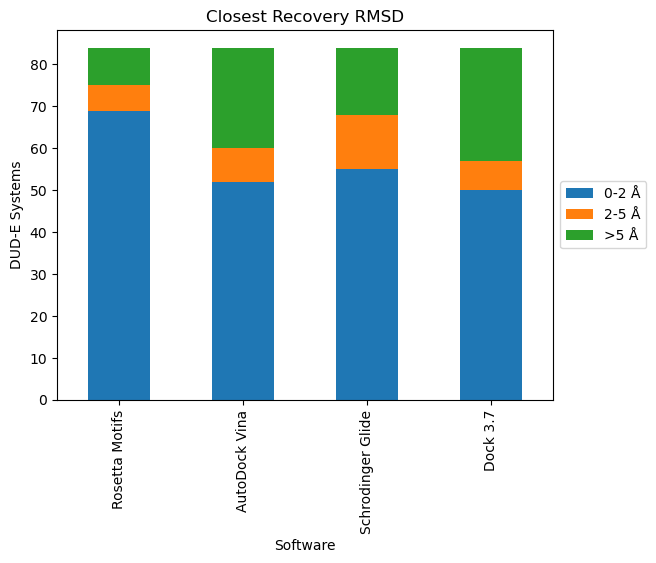

In [27]:
# Plot the data
ax = t_categorized_counts.plot(kind='bar', stacked=True)

# Add labels and title
ax.set_xlabel('Software')
ax.set_ylabel('DUD-E Systems')
ax.set_title('Closest Recovery RMSD')

# Adjust the plot to create space for the subtitle
#plt.subplots_adjust(top=0.85)
# Add subtitle (works in Matplotlib 3.4+)
#plt.text(0.5, 0.94, 'Single Best ddG Placement', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=10)

# Move legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()